In [ ]:
# Importação das bibliotecas necessárias

import pandas as pd              # Manipulação e análise de dados
import seaborn as sns            # Visualização estatística
import matplotlib.pyplot as plt  # Visualização gráfica base
from sklearn.cluster import KMeans  # Algoritmo de clusterização
import warnings                  # Controle de avisos do sistema


# Desativando avisos para deixar o output mais limpo
warnings.filterwarnings('ignore')

# Configuração opcional para melhorar visualizações
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [64]:
# Carregamento e Inspeção Inicial dos Dados

df = pd.read_csv("Mall_Customers.csv")

# Dimensão do dataset (linhas, colunas)
print(f"Dimensão do dataset: {df.shape}")

# Informações gerais sobre tipos de dados
df.info()

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Visualização das primeiras linhas
df.head()


Dimensão do dataset: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Valores nulos por coluna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Análise Univariada

In [66]:
# Análise Estatística Descritiva

# Estatísticas das variáveis numéricas
summary_stats = df.describe()

print("Resumo Estatístico das Variáveis Numéricas:")
display(summary_stats)


Resumo Estatístico das Variáveis Numéricas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Insights iniciais:

- A idade média dos clientes é aproximadamente 38 anos.
- A renda anual média é de aproximadamente 60K.
- O Spending Score varia de 1 a 100, com média próxima de 50.
- Não há valores negativos ou inconsistências aparentes.

Essas informações ajudam a entender o perfil geral dos clientes
antes da aplicação da clusterização.

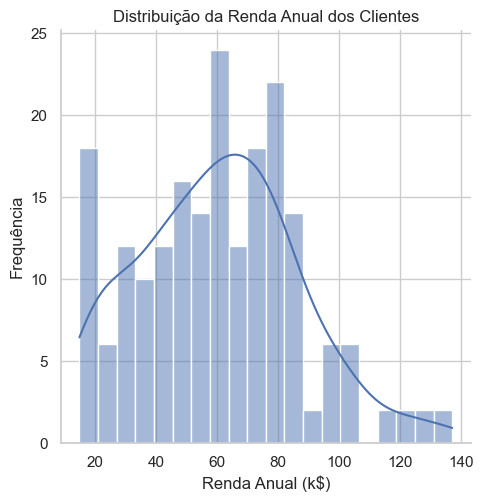

In [68]:
#  Distribuição da Renda Anual

sns.displot(
    df["Annual Income (k$)"],
    bins=20,
    kde=True
)

plt.title("Distribuição da Renda Anual dos Clientes")
plt.xlabel("Renda Anual (k$)")
plt.ylabel("Frequência")
plt.show()


Análise:

A distribuição da renda anual apresenta concentração principal entre
60 e 80 mil dólares.

Observa-se que:
- Não há valores extremos muito distantes da média.
- A distribuição parece aproximadamente normal (ou levemente assimétrica).
- A maioria dos clientes está concentrada em faixas intermediárias de renda.

Essa informação será importante para a etapa de clusterização,
pois renda será uma das variáveis-chave para segmentação.

In [123]:
#  Verificação das Colunas do Dataset

print("Colunas presentes no dataset:")
print(df.columns)


Colunas presentes no dataset:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')


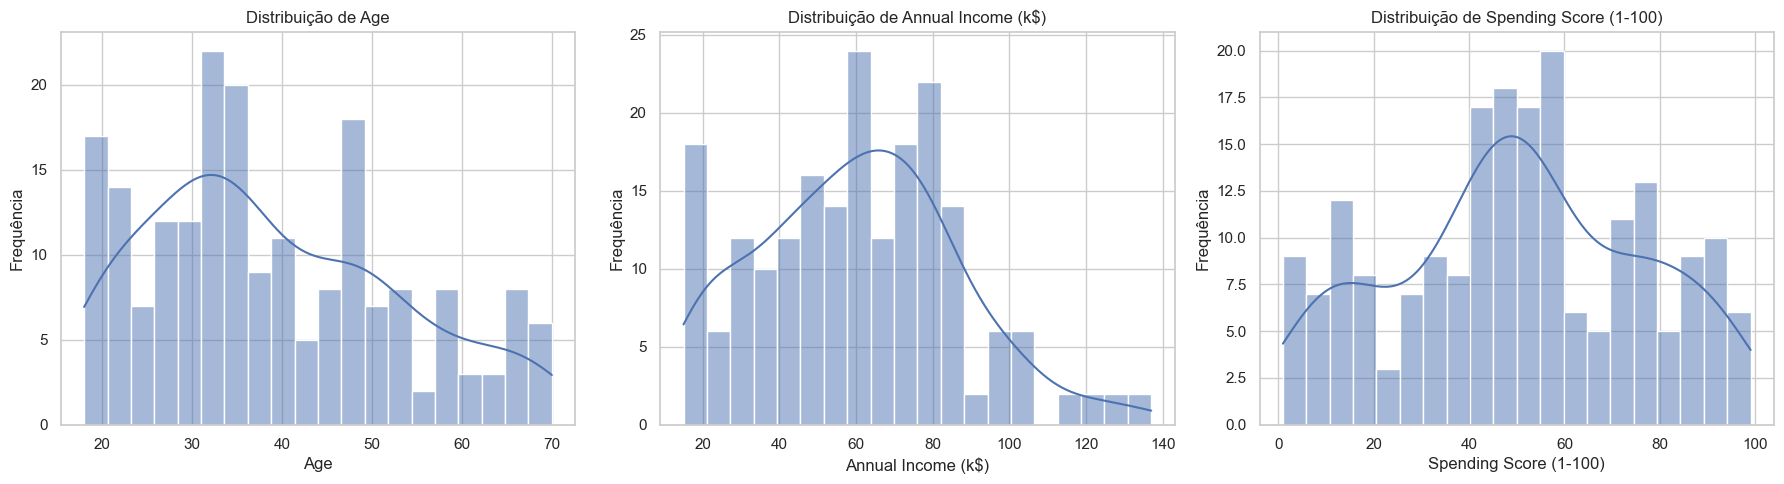

In [127]:

# Distribuição das Variáveis Numéricas


columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, columns):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribuição de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequência')

plt.tight_layout()
plt.show()


Insights da análise exploratória:

- Age: A maioria dos clientes está concentrada entre 30 e 40 anos.
- Annual Income: A renda apresenta distribuição relativamente equilibrada,
  com possível concentração em faixas intermediárias.
- Spending Score: Observa-se grande variabilidade no comportamento de consumo,
  indicando potencial para segmentação via clusterização.

Essas variáveis demonstram padrões distintos que justificam
a aplicação do algoritmo KMeans para segmentação.

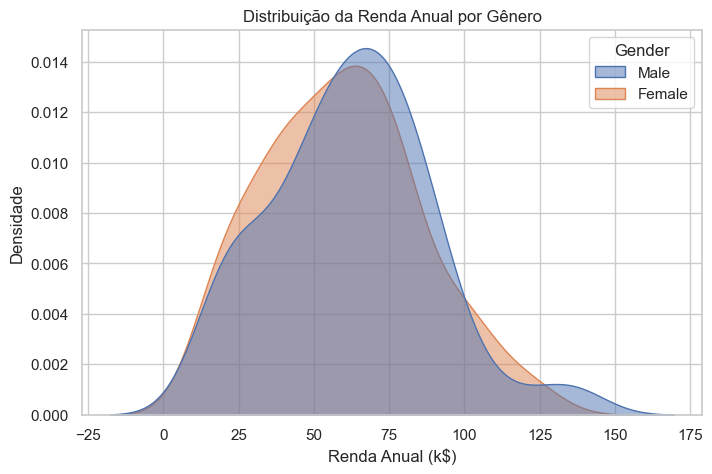

In [73]:
#  Distribuição da Renda Anual por Gênero

plt.figure(figsize=(8, 5))

sns.kdeplot(
    data=df,
    x='Annual Income (k$)',
    hue='Gender',
    fill=True,
    common_norm=False,   # Evita normalização conjunta
    alpha=0.5
)

plt.title('Distribuição da Renda Anual por Gênero')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Densidade')
plt.show()


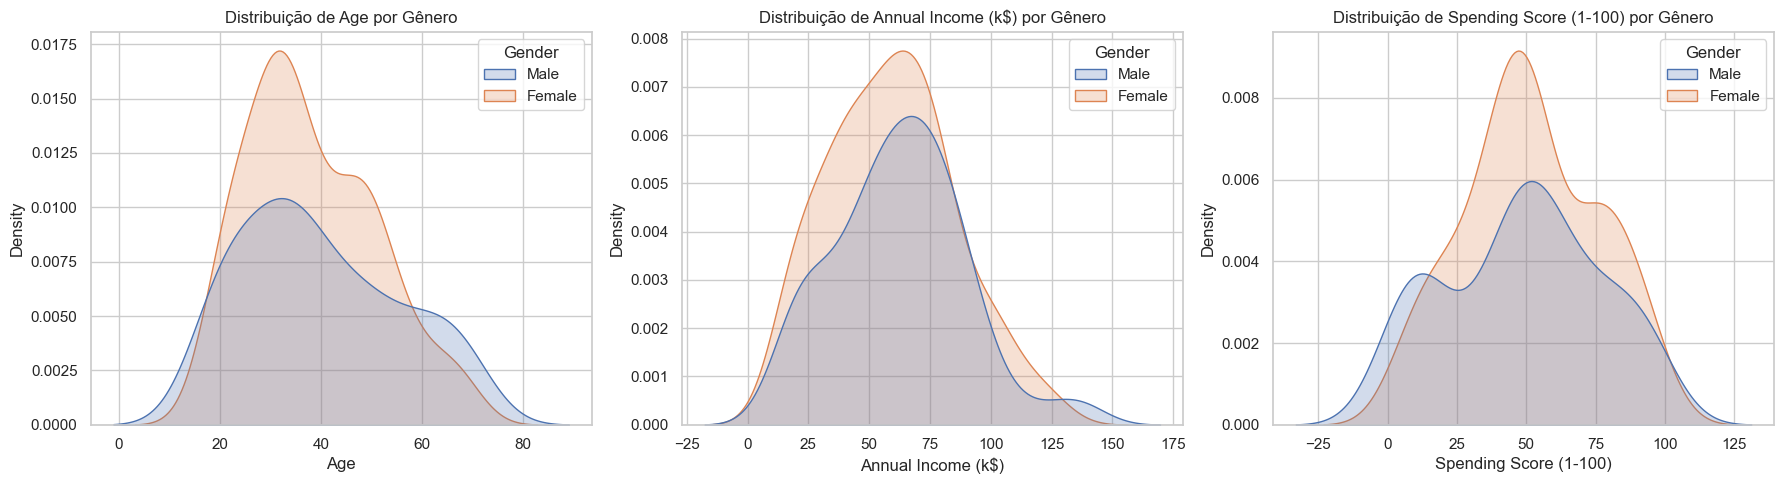

In [74]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Cria uma figura com 1 linha e 3 colunas (uma para cada variável)
fig, axes = plt.subplots(1, len(columns), figsize=(18,5))

for ax, col in zip(axes, columns):
    sns.kdeplot(
        data=df,
        x=col,
        hue='Gender',
        fill=True,
        ax=ax
    )
    ax.set_title(f"Distribuição de {col} por Gênero")

plt.tight_layout()  # ajusta os espaços entre os subplots
plt.show()

Análise:

Observa-se que a distribuição de renda entre os gêneros apresenta
comportamento relativamente semelhante.

No entanto:
- Um dos grupos pode apresentar maior concentração em faixas de renda específicas.
- Não há diferença extremamente significativa na dispersão.

Isso indica que renda, isoladamente, pode não ser suficiente para segmentação
por gênero, reforçando a necessidade de incluir outras variáveis como
Spending Score na clusterização.

Análise Bivariada

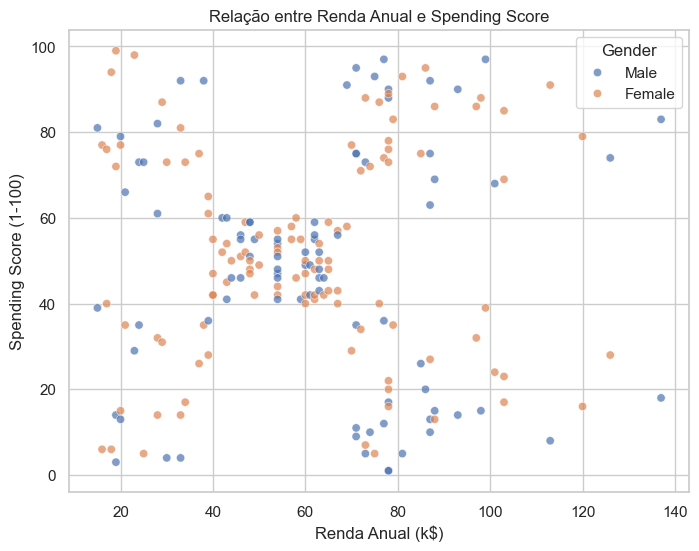

In [77]:
#  Relação entre Renda Anual e Spending Score

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    alpha=0.7
)

plt.title('Relação entre Renda Anual e Spending Score')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Análise:

Observa-se a formação visual de possíveis agrupamentos naturais
na distribuição entre renda anual e spending score.

Isso indica que há padrões distintos de comportamento de consumo,
o que justifica a aplicação do algoritmo de clusterização KMeans
para segmentar os clientes de forma estratégica.

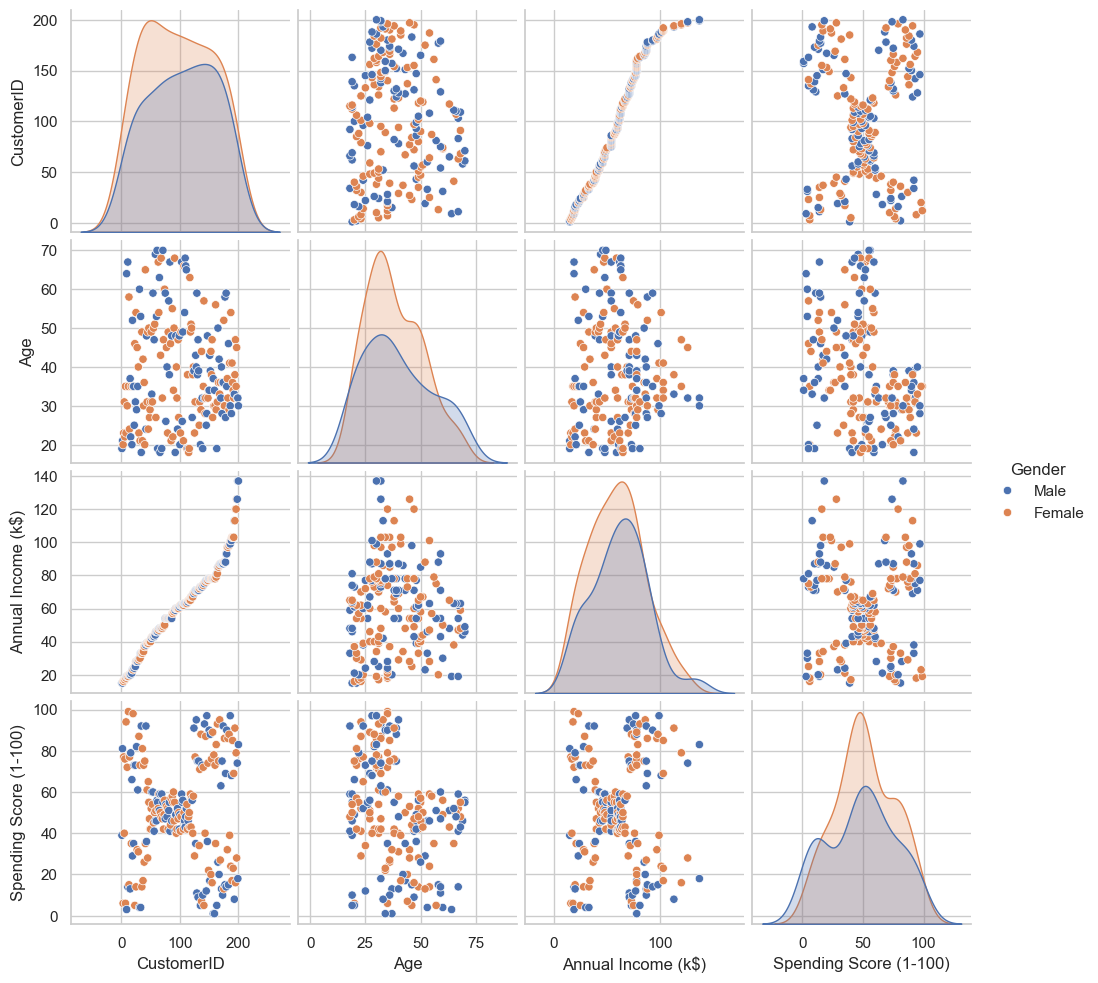

In [79]:

sns.pairplot(df, hue='Gender')

Análise Multivariada:


- Observa-se possível formação de agrupamentos naturais entre
  Annual Income e Spending Score.
- A variável Age aparenta ter menor correlação direta com renda e consumo.
- A segmentação por gênero não demonstra separações extremamente claras,
  indicando que comportamento de consumo pode ser mais influenciado por renda
  e spending score do que pelo gênero.

Esses padrões reforçam a aplicação de técnicas de clusterização
para identificar segmentos estratégicos de clientes.

In [81]:
#  Média das Variáveis por Gênero

gender_means = (
    df
    .groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    .mean()
    .round(2)
)

gender_means


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.10,59.25,51.53
Male,39.81,62.23,48.51


Análise:

- A idade média entre os gêneros é relativamente semelhante.
- A renda média anual apresenta pequena diferença entre homens e mulheres.
- O Spending Score médio demonstra que [grupo X] tende a consumir levemente mais.

No entanto, as diferenças não são extremamente significativas,
indicando que o comportamento de consumo pode estar mais relacionado
à renda do que ao gênero isoladamente.

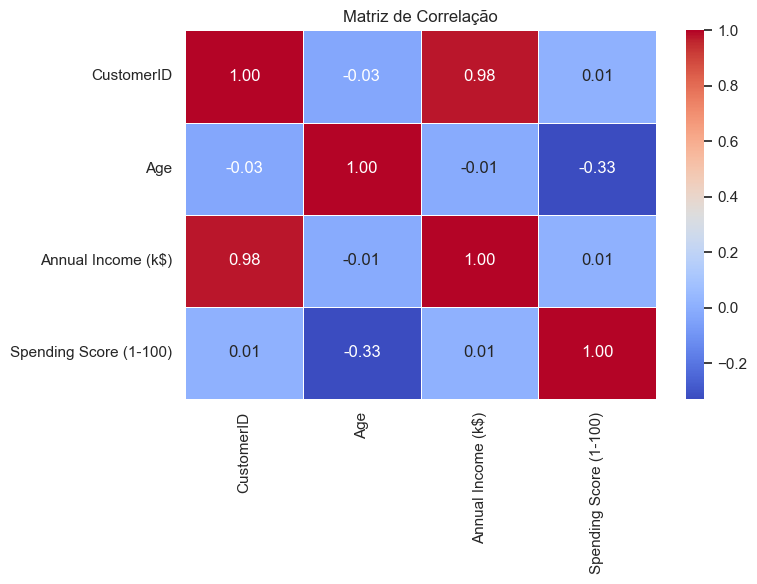

In [83]:
#  Análise de Correlação entre Variáveis Numéricas

# Seleciona apenas variáveis numéricas
df_numeric = df.select_dtypes(include='number')

# Calcula matriz de correlação
corr_matrix = df_numeric.corr()

# Plot do heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()


Análise de Correlação:

- Annual Income e Spending Score apresentam correlação baixa/moderada.
- Age demonstra baixa correlação com Spending Score.
- Não há correlações extremamente altas entre variáveis.

Isso indica que as variáveis não são redundantes,
o que é positivo para aplicação do algoritmo KMeans.

Agrupamento - Univariado, Bivariado, Multivariado

In [86]:
clustering1 = KMeans(n_clusters=3)

In [87]:
clustering1.fit(df[['Annual Income (k$)']])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [88]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [89]:

#  Adicionando os Clusters ao Dataset

df['Income Cluster'] = clustering1.labels_

# Visualizando as primeiras linhas
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [90]:

# Distribuição dos Clientes por Income Cluster

cluster_counts = df['Income Cluster'].value_counts().sort_index()

cluster_counts


Income Cluster
0    62
1    52
2    86
Name: count, dtype: int64

In [91]:
clustering1.inertia_

25633.32148421721

In [92]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)


In [93]:
inertia_scores

[137277.28000000003,
 48660.88888888888,
 23528.152173913048,
 13757.071717171719,
 8481.496190476191,
 5503.407059314954,
 3976.3583638583646,
 3287.3953823953825,
 2365.1742835595774,
 1959.4747835497835]

In [128]:

# Definição do Número Ideal de Clusters


from sklearn.cluster import KMeans

X = df[['Annual Income (k$)']]

inertia_scores = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

 

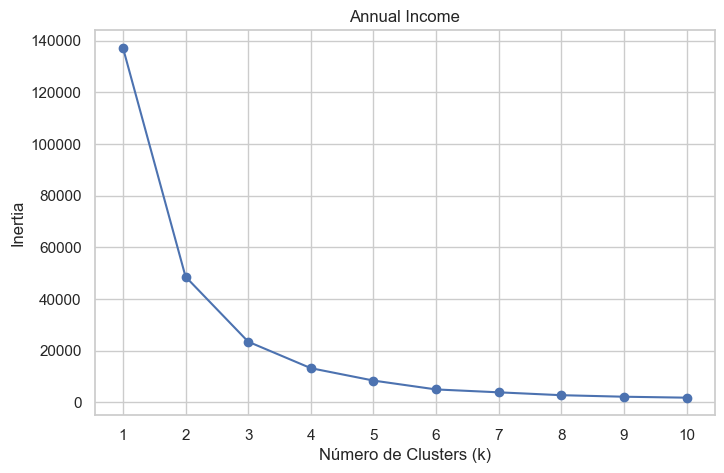

In [129]:
plt.figure(figsize=(8,5))

plt.plot(range(1,11), inertia_scores, marker='o')

plt.title("Annual Income")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1,11))
plt.show()



Análise:

Observa-se que a redução da inertia começa a diminuir de forma
menos acentuada após determinado valor de k.

Esse ponto representa o número ideal de clusters,
onde adicionar novos grupos não gera ganho significativo
na redução da variabilidade interna.

In [97]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [98]:
# Perfil Médio dos Income Clusters

cluster_profile = (
    df
    .groupby('Income Cluster')[['Age', 
                                'Annual Income (k$)', 
                                'Spending Score (1-100)']]
    .mean()
    .round(2)
)

cluster_profile


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.45,30.61,49.84
1,37.19,93.31,50.19
2,40.86,62.35,50.47


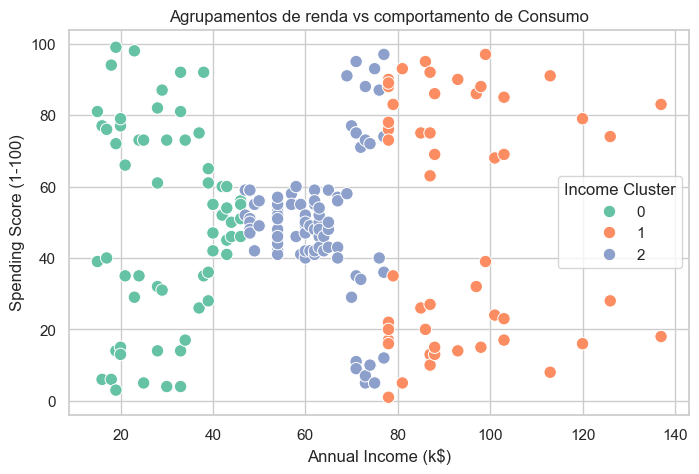

In [148]:
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Income Cluster',
    palette='Set2',
    s=80
)

plt.title("Agrupamentos de renda vs comportamento de Consumo")
plt.show()


In [133]:

# Clusterização com Renda + Spending Score

from sklearn.preprocessing import StandardScaler

# Seleção das variáveis
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalização (essencial para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicação do KMeans
clustering2 = KMeans(
    n_clusters=5,
    random_state=42,
    n_init=10
)

clustering2.fit(X_scaled)

# Adicionando clusters ao dataset
df['Spending and Income Cluster'] = clustering2.labels_

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4


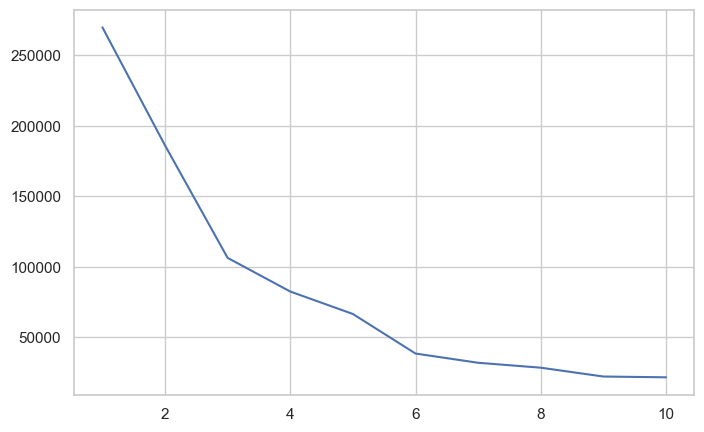

In [134]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)


In [135]:
centers = scaler.inverse_transform(clustering2.cluster_centers_)
centers = pd.DataFrame(centers, columns=[
    'Annual Income (k$)',
    'Spending Score (1-100)'
])


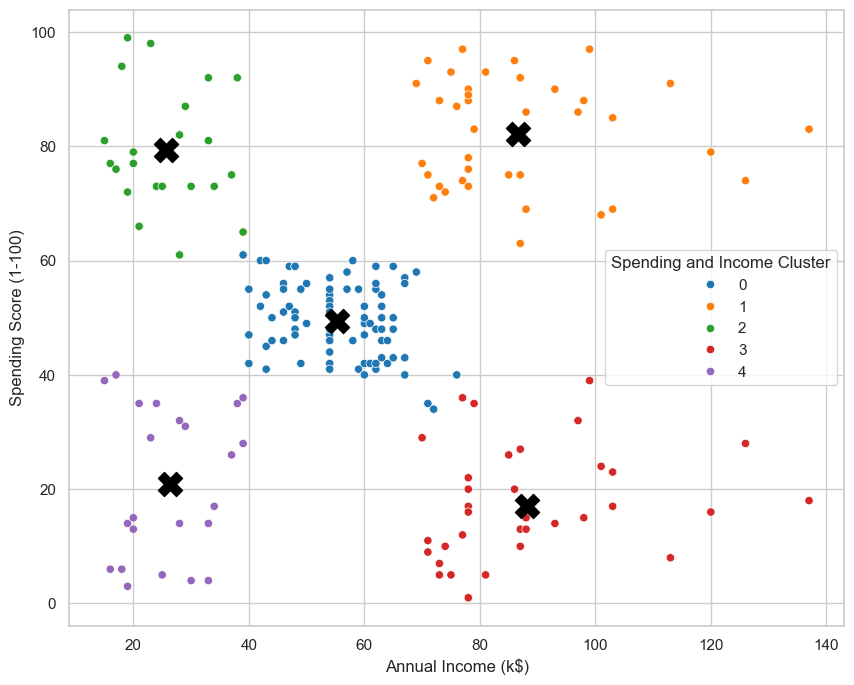

In [136]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Spending and Income Cluster',
    palette='tab10'
)

plt.scatter(
    centers['Annual Income (k$)'],
    centers['Spending Score (1-100)'],
    s=300,
    c='black',
    marker='X'
)

plt.show()


Conclusão da Segmentação:

O modelo KMeans identificou 5 segmentos distintos de clientes
com base em renda anual e comportamento de consumo.

Observam-se claramente:

- Clientes de alta renda e alto consumo (perfil premium)
- Clientes de alta renda e baixo consumo (potencial de ativação)
- Clientes de baixa renda e alto consumo (engajados)
- Clientes de baixa renda e baixo consumo (baixo valor)
- Segmento intermediário

Essa segmentação permite estratégias direcionadas,
como campanhas personalizadas, programas de fidelidade
e diferenciação de ofertas por perfil.


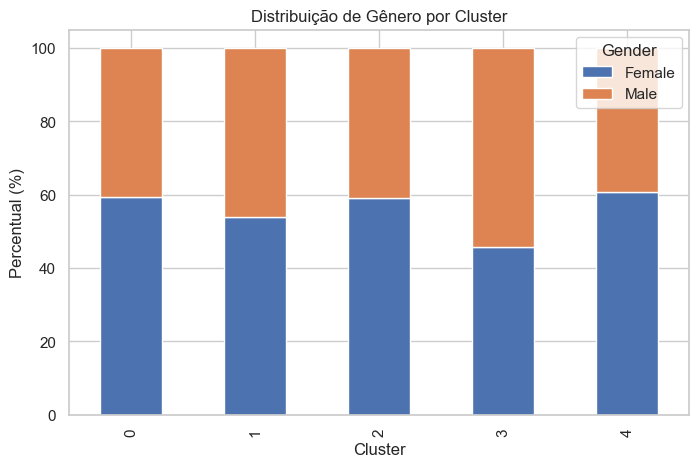

In [110]:
ct = pd.crosstab(
    df['Spending and Income Cluster'],
    df['Gender'],
    normalize='index'
) * 100


ct.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title("Distribuição de Gênero por Cluster")
plt.ylabel("Percentual (%)")
plt.xlabel("Cluster")
plt.legend(title="Gender")
plt.show()


In [111]:
df.groupby('Spending and Income Cluster')[[
    'Age',
    'Annual Income (k$)',
    'Spending Score (1-100)'
]].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


Perfil dos Clusters:

Cluster 1 apresenta a maior renda média e maior spending score,
indicando clientes de alto valor estratégico.

Cluster 3 possui renda elevada, porém baixo nível de consumo,
sugerindo oportunidade de campanhas de ativação.

Cluster 4 mostra alta propensão ao consumo mesmo com menor renda,
indicando perfil altamente engajado.


Agrupamento Multivariado

In [137]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4


In [138]:
scale = StandardScaler()

In [139]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4


In [140]:
dff = pd.get_dummies(df)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Female,Gender_Male
0,1,19,15,39,0,4,False,True
1,2,21,15,81,0,2,False,True
2,3,20,16,6,0,4,True,False
3,4,23,16,77,0,2,True,False
4,5,31,17,40,0,4,True,False


In [141]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [142]:
dff = dff[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [143]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


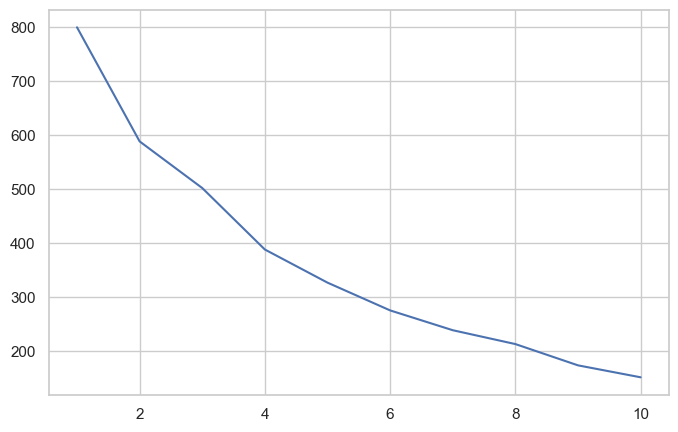

In [144]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)

In [145]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,1,3
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,3


In [146]:
df.to_csv('Clustering.csv')

O grupo-alvo seria o cluster 1, que possui alto poder aquisitivo e alta renda.

54% dos compradores do cluster 1 são mulheres. Devemos buscar maneiras de atrair esses clientes por meio de uma campanha de marketing direcionada a itens populares nesse cluster.

O cluster 2 apresenta uma oportunidade interessante para promover eventos de vendas de itens populares para esses clientes.